In [66]:
# Import necessaary libraries
import numpy as np
import matplotlib.pyplot as plt
from gradient_descent import gradient_descent
%matplotlib inline

In [67]:
# Function to compute the response data given the predictor data
def get_response_data(x):
    return np.cos(x) * np.exp(-x/10)

In [68]:
# Generate data for performing the gradient descent with Adam

# Get the 500 predictor data points from -15 to 15
x = np.linspace(-15, 15, 500)

# Generate the response data from predictor data using function 
# get_response_data above
y = get_response_data(x)

Text(0, 0.5, '$Y$')

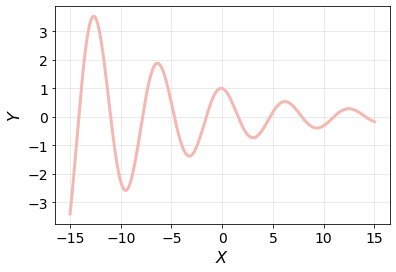

In [69]:
# Plot the generated data using the helper code given below
plt.plot(x, y, linewidth=3, color='#F5B7B1')
plt.grid(alpha=0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$Y$', fontsize=16)

In [70]:
# Function to compute the derivative
def derivative(W):
    return (-0.1 * ((np.exp(-W/10))* (10*np.sin(W) + np.cos(W)) ))

### ⏸ The bias correction for the first moment is given by which of the following equation? 


#### A. $\nu_{bias\  corr} = \frac{\nu}{(t- \rho_1^t)}$
#### B. $\nu_{bias\  corr} = \frac{\nu^t}{(1- \rho_1^t)}$
#### C. $\nu_{bias\  corr} = \frac{\nu}{(1 - \rho_1)}$
#### D. $\nu_{bias\  corr} = \frac{\nu}{(1-\rho_1^t)}$

In [71]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'

### ⏸ The bias correction for the second moment is given by which of the following equation? 


#### A. $r_{bias\ corr} = \frac {r}{(1-\rho_2^{t^2})}$
#### B. $r_{bias\ corr} = \frac {r}{(1-\rho_2^t)}$
#### C. $r_{bias\  corr} = \frac {r^2}{(1-\rho_2^t)}$
#### D. $r_{bias\  corr} = \frac{r^2}{(1-\rho_2^{t^2})}$

In [72]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'

In [73]:
#Function to perform gradient descent with Adam optimizer

# Parameter values as suggested in original Adam paper
def adam_descent(W, eta=0.01, rho1=0.9, rho2=0.999, delta=1e-8, tolerance=0.000001):

    #Variable to store the W value before update. This will help to 
    # check for convergence. 
    W_prev = 0 
    
    #Inititalise v and r to zero
    v = r = 0 
    
    # t is the iteration counter that will be used in the 
    # bias correction equations 
    t = 0

    # Save the current weights to a new list and append the updated 
    # weights in each iteration to the same
    Ws = [W]
    
    # Perform the update until convergence
    # Convergence is said to have taken place if 
    # the absolute difference between the previous and updated 
    # weight is less than the tolerance
    while (abs(W_prev - W) > tolerance):
        
        # Increment the counter t for each iteration
        t += 1
        
        # Compute the gradient of W by calling the derivative function
        g = derivative(W)
        
        # Update the v, the moving average of the gradient according to 
        # the equation given in the instructions
        v = rho1*v + (1-rho1)*g
        
        # Update the r, the moving average of the  squared gradient according 
        # to the equation given in the instructions
        r = rho2*r + (1-rho2)*g**2
        
        # According the the bias correction equations get the 
        # corrected v and r values
        v_bias_corr = v/(1-rho1**t)
        r_bias_corr = r/(1-rho2**t)   
        
        # Save the W value in W_prev before update for convergence test
        W_prev = W
                    
        # Update the weight parameters based on the equations 
        # given in the instructions
        W = W - eta*v_bias_corr/(delta + np.sqrt(r_bias_corr))   
        
        # Append the new weight list with the udpated weight value
        Ws.append(W)
        
    return Ws, t

The number of steps taken by gradient descent is 2332 and the number of steps taken by GD with Adam is 471
The number of steps taken by gradient descent is 8008 and the number of steps taken by GD with Adam is 683
The number of steps taken by gradient descent is 7114 and the number of steps taken by GD with Adam is 167
The number of steps taken by gradient descent is 8153 and the number of steps taken by GD with Adam is 562
The number of steps taken by gradient descent is 2272 and the number of steps taken by GD with Adam is 260
The number of steps taken by gradient descent is 1242 and the number of steps taken by GD with Adam is 698


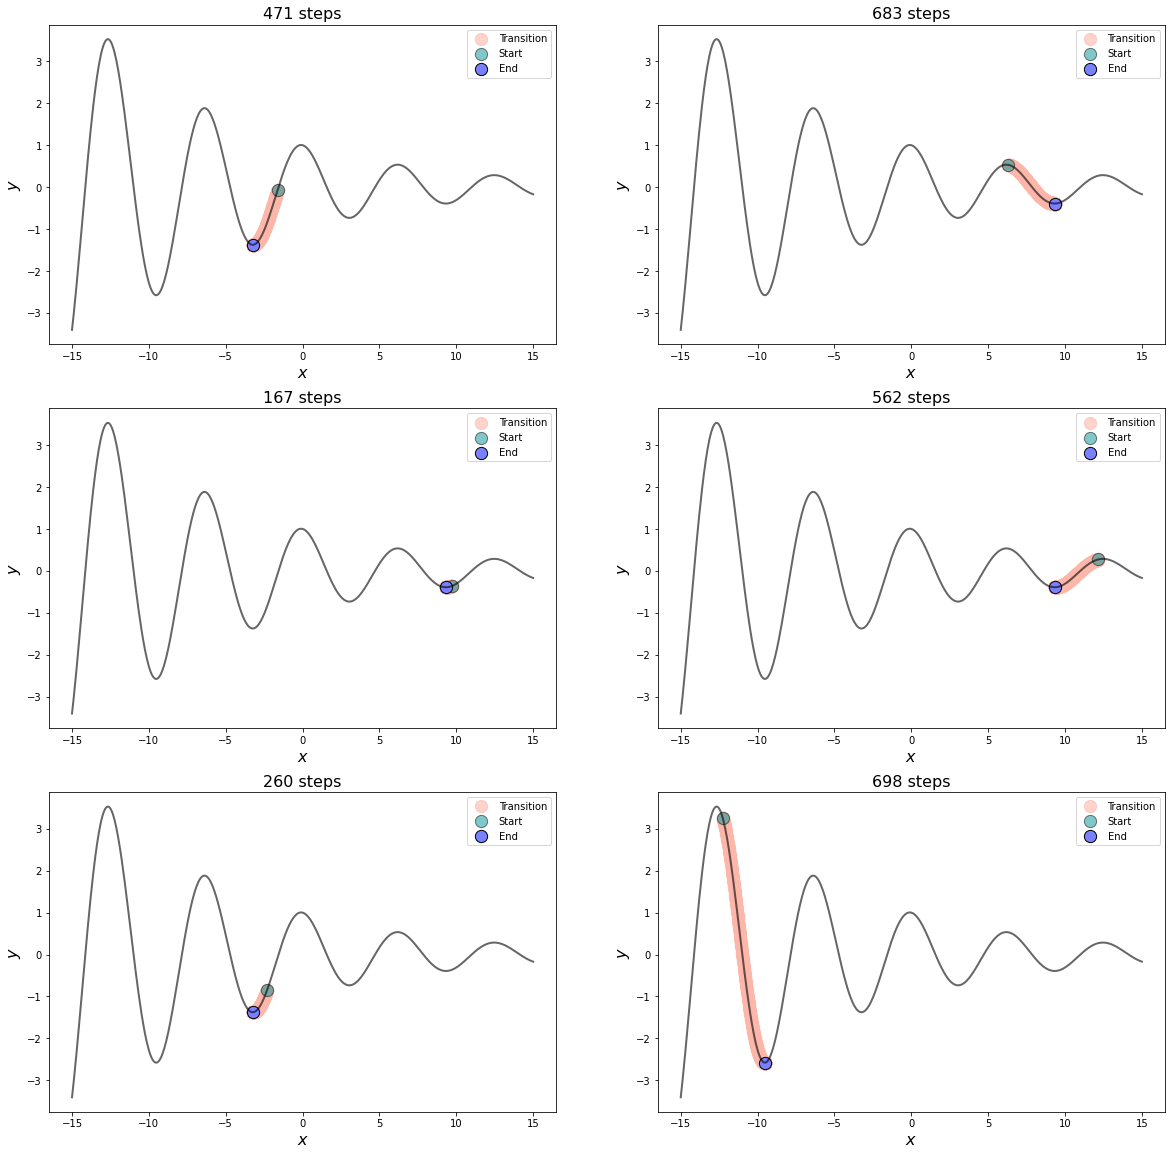

In [74]:
### edTest(test_adam_descent) ###

# Select an eta value that is less than or equal to 1
eta = 0.01

# Plot the descent with Adam starting from 6 random values of W
fig, axes = plt.subplots(3,2, figsize=(20,20))

# Run the loop for the number of plots to make
for ax in axes.ravel():
    
    # Initialise the weights to a random value between -15 and 15 
    W = np.random.uniform(-15, 15, 1)
    
    # Get the weights after gradient descent with Adam and the number of iterations 
    # by calling the adam_descent function with the initialised weight and selected epsilon value
    Ws, t = adam_descent(W, eta)
    
    # Helper function to call gradient_descent function and get number of steps
    Gs, tg = gradient_descent(W, epsilon=eta) 
    
    # Print the number of steps taken by gradient descent with and without Adam
    print(f'The number of steps taken by gradient descent is {tg} and the number of steps taken by GD with Adam is {t}')
    
    
    # Use the helper function below to plot how descent is working with Adam after initialising to random weight
    
    # Plot the original data
    ax.plot(x, y, color='black', alpha=0.6, linewidth=2)
    ax.scatter(np.array(Ws), get_response_data(np.array(Ws)), s=150, label='Transition', color='#FDB6AA', alpha=0.6)
    
    # Plot the starting point
    ax.scatter(Ws[0], get_response_data(Ws[0]), c='#009193', s=150, label='Start', alpha=0.5, edgecolor='black')
    ax.set_title(f'{t} steps', fontsize=16)
    # Plot the ending point
    ax.scatter(Ws[-1], get_response_data(Ws[-1]), c='#7A81FF', s=150, label='End',edgecolor='black')
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.legend(loc='best');